**Table of Contents** <br>
* [1. Import Libraries and Dataset](#importld)
* [2. Perspectives](#perspectives)

<hr>
<a class="anchor" id="importld">
    
# 1. Import Libraries and Dataset
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('datasets/data_clean.csv')

<hr>
<a class="anchor" id="importdataset">
    
# 2. Perspectives
    
</a>

In [3]:
df.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,Total_Orders,Total_Spent,Spent_Per_Order,Items_Per_Order,...,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai
0,0.107143,0.142857,0.307692,0.166667,0.0,0.011111,0.125,0.306394,0.578417,1.0,...,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0
1,0.071429,0.142857,0.076923,0.333333,0.0,0.011111,0.125,0.202472,0.379445,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.821429,0.000000,0.076923,0.333333,0.0,0.011111,0.125,0.094895,0.173895,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428571,0.142857,0.153846,0.166667,0.0,0.022222,0.125,0.335196,0.633505,0.4,...,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0
4,0.178571,0.142857,0.307692,0.000000,0.0,0.022222,0.125,0.591832,1.000000,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'Total_Orders', 'Total_Spent',
       'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'Loyalty',
       'Time_with_us', 'CUI_diversity', 'Night', 'Morning', 'Day', 'Dinner',
       'Weekdays', 'Weekends', 'Asian', 'Western', 'Other', 'customer_region',
       'last_promo', 'payment_method', 'Age_Group', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_OTHER',
       'CUI_Street_Food/Snacks', 'CUI_Thai'],
      dtype='object

In [5]:
# Split variables into perspectives
behavior_features = ['Total_Orders',
                     'Spent_Per_Order',  
                     'Time_with_us',]

time_features = ['Night', 'Day', 'Dinner']

preferences_features = ['Asian', 'Western', 'Other']

df_beh = df[behavior_features]
df_time = df[time_features]
df_pref = df[preferences_features]

# drop categorical and object columns to get means of each cluster
non_metric = df[['customer_region', 'last_promo', 'payment_method', 'Age_Group']]
df = df.drop(non_metric, axis=1)

<hr>
<a class="anchor" id="hclustering">
    
# 3. Hierarchical Clustering
    
</a>

In [6]:
# Performing HC on df_time
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels1 = hclust.fit_predict(df_pref)
hc_labels1

array([1, 1, 1, ..., 4, 1, 1])

In [ ]:
from sklearn.manifold import TSNE
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_beh)
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

In [7]:
# Performing HC on df_time
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels2 = hclust.fit_predict(df_time)
hc_labels2

array([2, 1, 1, ..., 3, 1, 2])

In [8]:
# Performing HC on df_pref
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels3 = hclust.fit_predict(df_pref)
hc_labels3

array([1, 1, 1, ..., 4, 1, 1])

In [9]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels1, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,Total_Orders,Total_Spent,Spent_Per_Order,Items_Per_Order,...,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai
labels,,,,,,,,,,,,,,,,,,,,,
0,0.445101,0.448918,0.563212,0.460224,0.229515,0.811582,0.569061,0.740377,0.593307,0.407178,...,3.721452,0.280232,0.214582,4.358417,3.387337,8.998898,0.468106,0.553054,10.707272,1.856353
1,0.436459,0.169456,0.152536,0.289813,0.368630,0.650730,0.193916,0.175092,0.300877,0.129990,...,1.037722,0.155871,0.203198,1.388345,1.090971,2.142258,0.353546,0.835129,0.445764,0.663015
2,0.439400,0.739723,0.804439,0.738187,0.146865,0.885112,0.826236,0.868017,0.450136,0.341227,...,4.776300,5.130421,4.690606,4.197192,7.064415,8.481541,1.908212,14.461375,9.108011,2.594751
3,0.440357,0.226955,0.312918,0.335070,0.301357,0.715082,0.340452,0.390801,0.485282,0.309523,...,0.277584,0.135109,0.137884,0.310400,9.680268,0.641485,1.655466,0.648472,9.962572,0.276103
4,0.432474,0.279146,0.303843,0.437696,0.310111,0.712527,0.345407,0.312537,0.378994,0.244954,...,0.458691,2.301099,2.885526,0.448967,0.763172,0.876069,0.360843,8.515438,0.317350,0.344431


In [10]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels2, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,Total_Orders,Total_Spent,Spent_Per_Order,Items_Per_Order,...,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai
labels,,,,,,,,,,,,,,,,,,,,,
0,0.439662,0.629213,0.707217,0.760085,0.145668,0.860477,0.791109,0.585153,0.261084,0.222303,...,3.952704,1.047837,1.842235,4.239942,8.244773,5.840236,2.107243,9.118120,3.863130,2.377682
1,0.435198,0.163265,0.178418,0.285741,0.365291,0.668839,0.201621,0.254409,0.398104,0.211784,...,0.701751,0.580942,0.946402,0.832212,1.635239,2.261789,0.418909,1.783299,3.077418,0.506389
2,0.438542,0.122613,0.149355,0.238876,0.380016,0.634888,0.163903,0.207372,0.362048,0.215819,...,0.626729,0.224106,0.306560,1.663852,3.516118,1.675350,0.426436,2.152952,2.029202,0.774542
3,0.437620,0.175282,0.186032,0.247465,0.368179,0.661483,0.199559,0.324426,0.508870,0.244082,...,0.788405,1.078307,0.639845,0.459415,0.598264,1.680074,0.358775,0.617837,3.823678,0.110206
4,0.436924,0.431845,0.430903,0.450685,0.251997,0.792514,0.477584,0.583901,0.504224,0.263574,...,1.718172,2.687973,1.744775,0.262269,0.561709,5.032468,0.262989,0.815681,10.563198,0.106396


In [11]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels3, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,Total_Orders,Total_Spent,Spent_Per_Order,Items_Per_Order,...,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai
labels,,,,,,,,,,,,,,,,,,,,,
0,0.445101,0.448918,0.563212,0.460224,0.229515,0.811582,0.569061,0.740377,0.593307,0.407178,...,3.721452,0.280232,0.214582,4.358417,3.387337,8.998898,0.468106,0.553054,10.707272,1.856353
1,0.436459,0.169456,0.152536,0.289813,0.368630,0.650730,0.193916,0.175092,0.300877,0.129990,...,1.037722,0.155871,0.203198,1.388345,1.090971,2.142258,0.353546,0.835129,0.445764,0.663015
2,0.439400,0.739723,0.804439,0.738187,0.146865,0.885112,0.826236,0.868017,0.450136,0.341227,...,4.776300,5.130421,4.690606,4.197192,7.064415,8.481541,1.908212,14.461375,9.108011,2.594751
3,0.440357,0.226955,0.312918,0.335070,0.301357,0.715082,0.340452,0.390801,0.485282,0.309523,...,0.277584,0.135109,0.137884,0.310400,9.680268,0.641485,1.655466,0.648472,9.962572,0.276103
4,0.432474,0.279146,0.303843,0.437696,0.310111,0.712527,0.345407,0.312537,0.378994,0.244954,...,0.458691,2.301099,2.885526,0.448967,0.763172,0.876069,0.360843,8.515438,0.317350,0.344431


In [12]:
# Computing SST
X = df_beh.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels1):
    X_k = X[hc_labels1 == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels1):
    X_k = X[hc_labels1 == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True])

In [13]:
# Computing SST
X = df_time.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels2):
    X_k = X[hc_labels2 == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels2):
    X_k = X[hc_labels2 == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True])

In [14]:
# Computing SST
X = df_pref.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels3):
    X_k = X[hc_labels3 == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels3):
    X_k = X[hc_labels3 == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True])

In [15]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [16]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust1 = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust1.fit_predict(df_beh)

array([21334, 31736, 25674, ...,     5,     2,     0])

In [17]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust2 = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust2.fit_predict(df_time)

array([31736, 31735, 20094, ...,     1,     2,     0])

In [18]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust3 = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust3.fit_predict(df_pref)

array([19794, 21598, 22610, ...,     2,     1,     0])

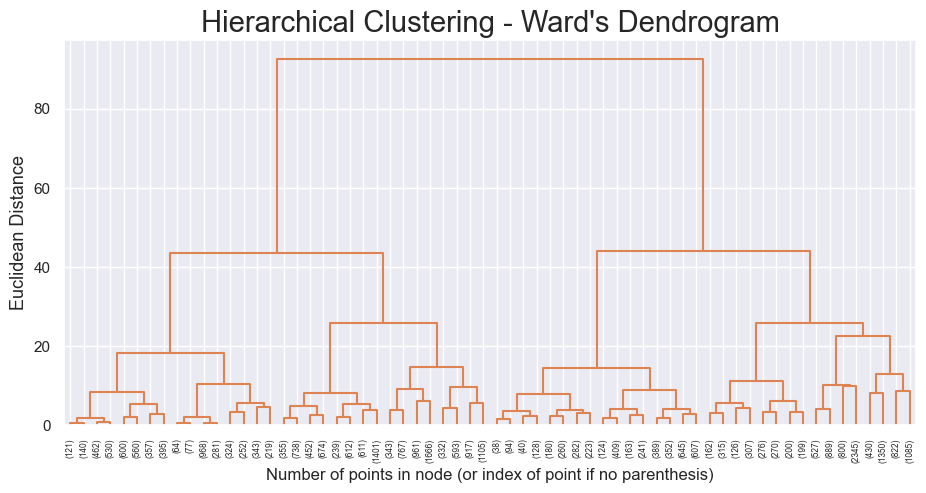

In [19]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust1.children_.shape[0])
n_samples = len(hclust1.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust1.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust1.children_, hclust1.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

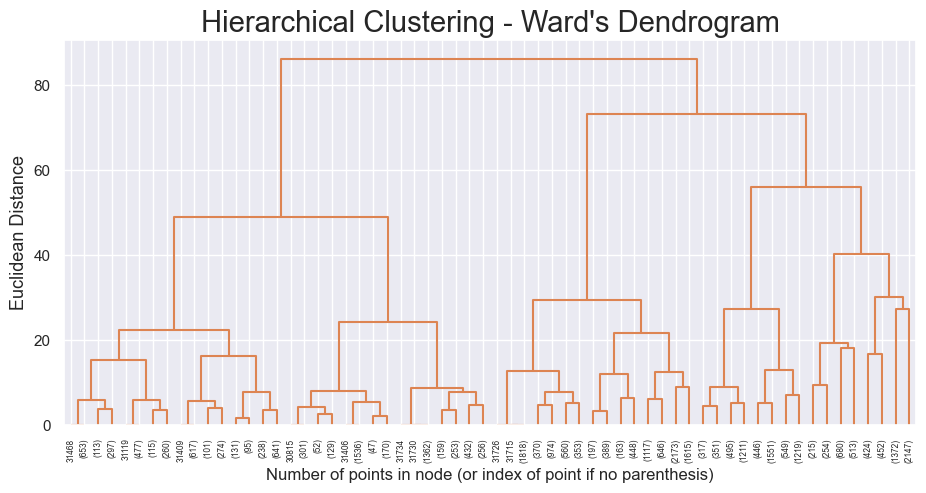

In [20]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust2.children_.shape[0])
n_samples = len(hclust2.labels_)

# hclust2.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust2.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust2.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust2.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust2.children_, hclust2.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

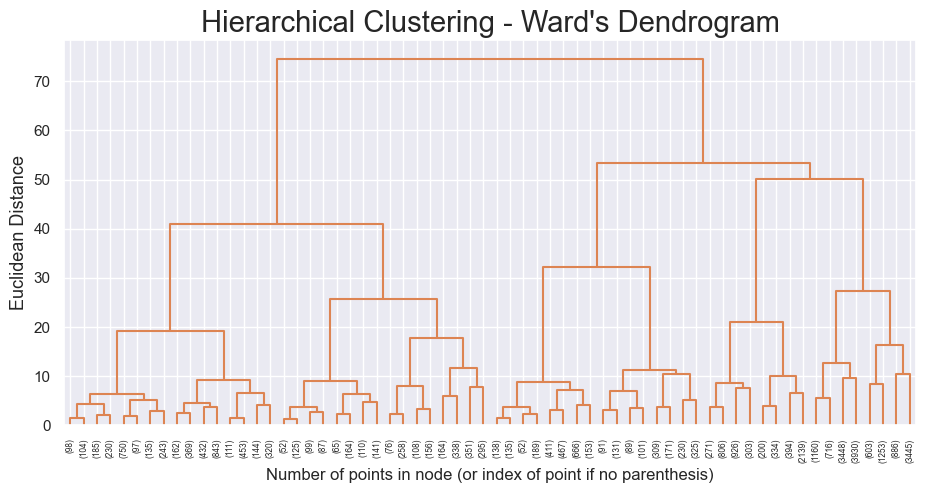

In [21]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust3.children_.shape[0])
n_samples = len(hclust3.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust3.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust3.children_, hclust3.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

#### Test Cluster Solutions

In [22]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels1, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,Total_Orders,Total_Spent,Spent_Per_Order,Items_Per_Order,...,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai
labels,,,,,,,,,,,,,,,,,,,,,
0,0.445101,0.448918,0.563212,0.460224,0.229515,0.811582,0.569061,0.740377,0.593307,0.407178,...,3.721452,0.280232,0.214582,4.358417,3.387337,8.998898,0.468106,0.553054,10.707272,1.856353
1,0.436459,0.169456,0.152536,0.289813,0.368630,0.650730,0.193916,0.175092,0.300877,0.129990,...,1.037722,0.155871,0.203198,1.388345,1.090971,2.142258,0.353546,0.835129,0.445764,0.663015
2,0.439400,0.739723,0.804439,0.738187,0.146865,0.885112,0.826236,0.868017,0.450136,0.341227,...,4.776300,5.130421,4.690606,4.197192,7.064415,8.481541,1.908212,14.461375,9.108011,2.594751
3,0.440357,0.226955,0.312918,0.335070,0.301357,0.715082,0.340452,0.390801,0.485282,0.309523,...,0.277584,0.135109,0.137884,0.310400,9.680268,0.641485,1.655466,0.648472,9.962572,0.276103
4,0.432474,0.279146,0.303843,0.437696,0.310111,0.712527,0.345407,0.312537,0.378994,0.244954,...,0.458691,2.301099,2.885526,0.448967,0.763172,0.876069,0.360843,8.515438,0.317350,0.344431


In [23]:
# 2 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc2lust1 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=2)
hc2_labels1 = hc2lust1.fit_predict(df_beh)

In [24]:
df_concat = pd.concat((df, pd.Series(hc2_labels1, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[behavior_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1
Total_Orders,0.59,0.13
Spent_Per_Order,0.34,0.43
Time_with_us,0.71,0.14


In [25]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3lust1 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=3)
hc3_labels1 = hc3lust1.fit_predict(df_beh)

In [26]:
df_concat = pd.concat((df, pd.Series(hc3_labels1, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[behavior_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2
Total_Orders,0.13,0.43,0.98
Spent_Per_Order,0.43,0.35,0.31
Time_with_us,0.14,0.66,0.81


In [27]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust1 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels1 = hc4lust1.fit_predict(df_beh)

In [28]:
df_concat = pd.concat((df, pd.Series(hc4_labels1, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[behavior_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3
Total_Orders,0.16,0.43,0.98,0.06
Spent_Per_Order,0.28,0.35,0.31,0.75
Time_with_us,0.18,0.66,0.81,0.05


In [29]:
# 2 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc2lust2 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=2)
hc2_labels2 = hc2lust2.fit_predict(df_time)

In [30]:
df_concat = pd.concat((df, pd.Series(hc2_labels2, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[time_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1
Night,0.04,0.75
Morning,0.35,0.34
Day,0.30,0.10
Dinner,0.27,0.04


In [31]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3lust2 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=3)
hc3_labels2 = hc3lust2.fit_predict(df_time)

In [32]:
df_concat = pd.concat((df, pd.Series(hc3_labels2, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[time_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2
Night,0.08,0.75,0.00
Morning,0.66,0.34,0.00
Day,0.34,0.10,0.26
Dinner,0.33,0.04,0.19


In [33]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust2 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels2 = hc4lust2.fit_predict(df_time)

In [34]:
df_concat = pd.concat((df, pd.Series(hc4_labels2, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[time_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3
Night,0.75,0.17,0.00,0.00
Morning,0.34,0.63,0.00,0.69
Day,0.10,0.56,0.26,0.12
Dinner,0.04,0.60,0.19,0.06


In [36]:
# 2 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc2lust3 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=2)
hc2_labels3 = hc2lust3.fit_predict(df_pref)

In [ ]:
df_concat = pd.concat((df, pd.Series(hc2_labels3, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[preferences_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [38]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3lust3 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=3)
hc3_labels3 = hc3lust3.fit_predict(df_pref)

In [ ]:
df_concat = pd.concat((df, pd.Series(hc3_labels3, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[preferences_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [40]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust3 = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels3 = hc4lust3.fit_predict(df_pref)

In [ ]:
df_concat = pd.concat((df, pd.Series(hc4_labels3, name='labels', index=df.index)), axis=1)
cluster_means = df_concat.groupby('labels').mean()[preferences_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)